In [1]:
%matplotlib inline

This notebook reproduces 

> **Fig 11**: Stark states of $n=30$ and 31 states of Ps, with $m=2$ (grey dashed) and $m=29$ (black). In the $n=30$ level, the $m=29$ state is a circular state and experiences no first-order Stark shift and only a very weak second-order shift, as explained in the text.

from the article

> #### Prospects for Studies of the Free Fall and Gravitational Quantum States of Antimatter
>
> G. Dufour, D. B. Cassidy, P. Crivelli, P. Debu, A. Lambrecht, V. V. Nesvizhevsky, S. Reynaud, A. Yu. Voronin, and T. E. Wall.
>
> *Adv. High En. Phys.*, **2015**, 379642 (2015) [DOI:10.1155/2015/379642](https://dx.doi.org/10.1155/2015/379642)

This article uses an $|\, n \, l \, m_l \, \rangle$ basis and plots the Stark structure for $m_l=2$ and $m_l=29$.

The calculation below uses an $|\, n \, l \, S \, J \, M_J \, \rangle$ basis with $S=0$ and plots Stark structure for $M_J = 2$ and $M_J=29$.

In [2]:
# packages
import os
from functools import reduce
from psfs import Hamiltonian, En_h, h, c
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.formatter.useoffset'] = False

In [3]:
# construct matrix
mat0 = Hamiltonian(n_min=29, n_max=32, S=0, MJ=2)
print('Number of basis states:', '%d'%mat0.num_states)
mat1 = Hamiltonian(n_min=29, n_max=32, S=0, MJ=29)
print('Number of basis states:', '%d'%mat1.num_states)

Number of basis states: 114
Number of basis states: 6


In [4]:
# calculate Stark map
Efield = np.linspace(0, 50, 300)  # V/cm
sm0 = mat0.stark_map(Efield*1e2)
sm1 = mat1.stark_map(Efield*1e2)

diagonalise Hamiltonian: 100%|██████████| 300/300 [00:00<00:00, 13810.83it/s]


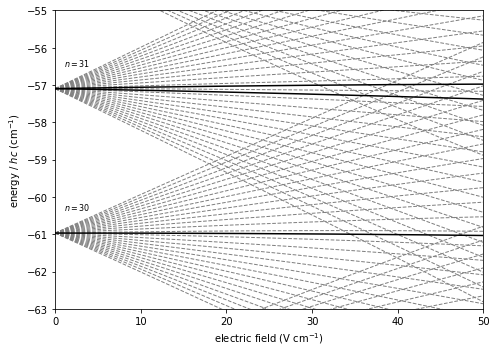

In [5]:
fig, ax = plt.subplots(figsize=(7, 5))

# plot
#MJ = 2
indexes = range(mat0.num_states)
for ix in indexes:
    ax.plot(Efield, 1e-2*sm0[:, ix] / (h * c), ls='--', lw=1, alpha=1, c=(0.5, 0.5, 0.5))

# MJ = 30
indexes = range(mat1.num_states)
for ix in indexes:
    ax.plot(Efield, 1e-2*sm1[:, ix] / (h * c), ls='-', lw=1.5, alpha=1, c='k')
    
# labels
for n in [30, 31]:
    first_state = mat0.where('n', n)[0]
    en = mat0.basis[first_state].E0
    lbl_y = 1e-2*en * En_h / (h * c)
    ax.annotate(r'$n=%d$'%n, [1, lbl_y + 0.6], size=8)

# format
ax.set_xlabel('electric field (V cm$^{-1}$)')
ax.set_ylabel('energy / $h c$ (cm$^{-1}$)')
ax.set_xlim(0, 50)
ax.set_ylim(-63, -55)

# output
plt.tight_layout()
fileout = os.path.join("../images/stark_n31_singlet_MJ2_MJ29.png")
plt.savefig(fileout, dpi=150)
plt.show()